In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data description
Description = pd.read_excel('Sample Survey.xlsx')
Description

,Column,Description
0,response_id,Unique id for each sample (respondent).
1,collection_date,Date on which the sample was collected.
2,urban_rural,Whether the respodent belongs to a rural or ur...
3,education,The education qualitfication of the repondent
4,income,Income of the respondent.
5,Vote_Now,"If elections are held today, which party will ..."
6,Past_Vote,Which party did the respondent vote for in the...
7,CM_satisfaction,How satisfied is the respondent with the perfo...
8,MLA_satisfaction,How satisfied is the respondent with the perfo...
9,age,The age of the respondent.


In [3]:
# 1. Load the dataset into a pandas dataframe & name the variable as “survey”.
survey = pd.read_excel('Sample Survey.xlsx', sheet_name = ['Data']) 
survey

{'Data':       response_id collection_date urban_rural               education  \
 0               1      2020-08-24       Rural               12th Pass   
 1               2      2020-08-24       Rural                Graduate   
 2               3      2020-08-24       Rural                Graduate   
 3               4      2020-08-24       Urban                Graduate   
 4               5      2020-08-24       Rural                Graduate   
 ...           ...             ...         ...                     ...   
 6862         6863      2020-09-01       Rural               10th Pass   
 6863         6864      2020-09-01       Rural                Graduate   
 6864         6865      2020-09-01       Urban                Graduate   
 6865         6866      2020-09-01       Rural  Professional Education   
 6866         6867      2020-09-01       Rural               10th Pass   
 
                    income Vote_Now     Past_Vote     CM_satisfaction  \
 0     ₹ 30,000 - ₹ 50,000   

### Ans-1 Done above ^

In [4]:
survey.keys()

dict_keys(['Data'])

In [5]:
survey=survey['Data'] 

In [6]:
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [8]:
# 2. How many samples were collected on each day?
survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

### Ans-2 Done above ^

<AxesSubplot:>

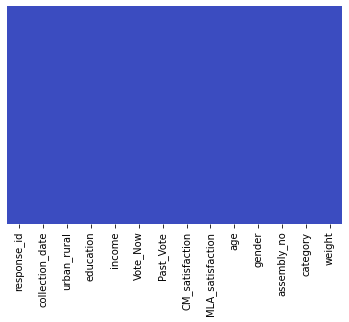

In [9]:
# Check for null values
sns.heatmap(survey.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [10]:
#frequency of object features
for col in survey.columns:
    if survey[col].dtype=="object":
        print(survey[col].value_counts())
        print()

Rural    5135
Urban    1732
Name: urban_rural, dtype: int64

Graduate                  3322
12th Pass                 1330
Post - Graduation         1211
Professional Education     404
10th Pass                  398
8th Pass                   179
Illiterate                  23
Name: education, dtype: int64

₹ 5,000 - ₹ 10,000       1671
BPL/Below ₹ 5,000        1484
₹ 10,000 - ₹ 20,000      1022
₹ 20,000 - ₹ 30,000       781
₹ 30,000 - ₹ 50,000       577
₹ 1,50,000 & above        543
₹ 50,000 - ₹ 80,000       432
₹ 80,000 - ₹ 1,50,000     357
Name: income, dtype: int64

BJP           2367
RJD           1996
JD(U)          526
NOTA           458
JAP(L)         313
Plurals        217
INC            216
Undecided      164
RJJP           142
LJP            102
Others          87
RLSP            82
Left Front      79
AIMIM           37
VIP             28
AAP             27
BSP             15
HAM             11
Name: Vote_Now, dtype: int64

BJP             2823
JD(U)           1374
RJD      

In [11]:
survey['age'].replace(to_replace = "24ko", value =24, inplace=True)

In [12]:
#frequency of object features
for col in survey.columns:
    if survey[col].dtype=="int64":
        print(survey[col].value_counts())
        print()

2049    1
6734    1
2636    1
4679    1
6726    1
       ..
5368    1
3315    1
1266    1
5360    1
2047    1
Name: response_id, Length: 6867, dtype: int64

25    598
24    450
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
35    263
32    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    104
37     90
45     82
43     72
39     69
50     60
44     54
41     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
61     12
53     12
54     11
57     10
56      9
58      9
64      8
67      7
62      5
65      5
59      5
63      4
66      4
68      4
70      3
71      2
75      1
76      1
72      1
69      1
74      1
99      1
Name: age, dtype: int64

230    100
94      80
83      77
156     75
168     74
      ... 
57       8
1        7
5        7
52       7
11       7
Name: assembly_no, Length: 241, dtype: int64



In [13]:
# 3. What proportion of the total respondents were aged less than 45?
surveyage = survey.apply(lambda x: True if x['age'] < 45 else False , axis=1)
numOfRows = len(surveyage[surveyage == True].index)
numOfRows

6399

In [14]:
a=(6399/6867)*100
print("%.2f" % a)

93.18


### Ans-3 Done above ^

In [15]:
# 4. Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.
bins = [18, 25, 40, 55, 120]
labels = ['18-25', '25-40', '40-55', '55+']
survey['age_group'] = pd.cut(survey.age, bins, labels = labels,include_lowest = True)

print(survey[['response_id','age','age_group']])

      response_id  age age_group
0               1   26     25-40
1               2   34     25-40
2               3   25     18-25
3               4   36     25-40
4               5   22     18-25
...           ...  ...       ...
6862         6863   25     18-25
6863         6864   30     25-40
6864         6865   20     18-25
6865         6866   23     18-25
6866         6867   33     25-40

[6867 rows x 3 columns]


### Ans-4 Done above ^

In [16]:
# 5. How many samples were collected for each age-group? Which age-group had the most samples?
survey['age_group'].value_counts()

25-40    3423
18-25    2692
40-55     644
55+       108
Name: age_group, dtype: int64

### Ans-5 Done above ^

In [17]:
# 6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?
tempsurvey1=survey['Vote_Now'].value_counts().reset_index()
tempsurvey1

,index,Vote_Now
0,BJP,2367
1,RJD,1996
2,JD(U),526
3,NOTA,458
4,JAP(L),313
5,Plurals,217
6,INC,216
7,Undecided,164
8,RJJP,142
9,LJP,102


In [18]:
tempsurvey1.rename(columns = {'index':'vote_now', 'Vote_Now':'vote_now_count'}, inplace = True)
tempsurvey1

,vote_now,vote_now_count
0,BJP,2367
1,RJD,1996
2,JD(U),526
3,NOTA,458
4,JAP(L),313
5,Plurals,217
6,INC,216
7,Undecided,164
8,RJJP,142
9,LJP,102


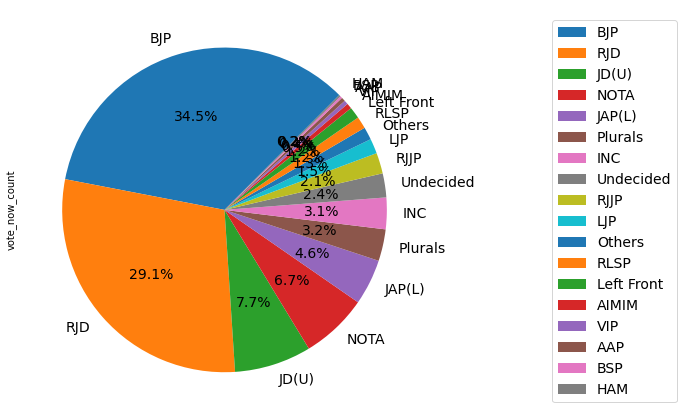

In [19]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
tempsurvey1.plot(kind='pie', y = 'vote_now_count', ax=ax1, autopct='%1.1f%%', 
 startangle=45, shadow=False, labels=tempsurvey1['vote_now'],  fontsize=14)
plt.legend( bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=14, 
           bbox_transform=plt.gcf().transFigure)


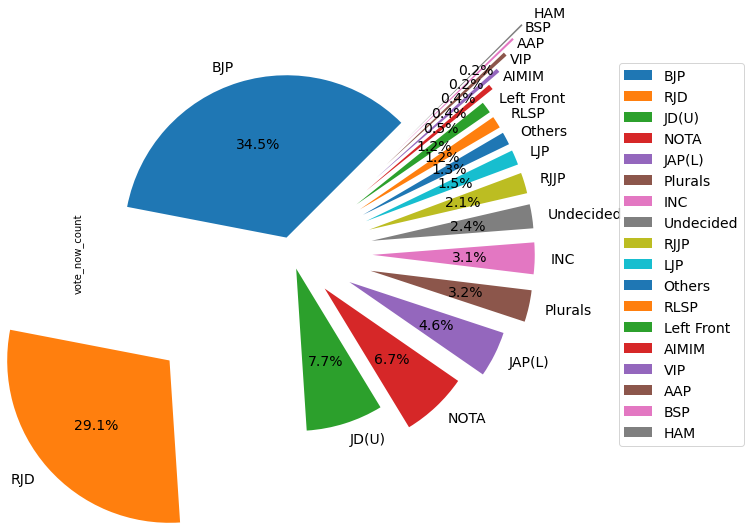

In [20]:
plt.figure(figsize=(16,8))
# plot chart
explode = (0.1, 1, 0.1, 0.3, 0.4, 0.5, 0.5,0.5,0.5,0.5,0.5, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1)
ax1 = plt.subplot(121, aspect='equal')
tempsurvey1.plot(kind='pie', y = 'vote_now_count', ax=ax1, autopct='%1.1f%%', 
 startangle=45, shadow=False, explode=explode, labels=tempsurvey1['vote_now'],  fontsize=14)
plt.legend( bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=14, 
           bbox_transform=plt.gcf().transFigure)


### Ans-6 part-1 Done above ^

In [21]:
tempsurvey2=survey['Past_Vote'].value_counts().reset_index()
tempsurvey2

,index,Past_Vote
0,BJP,2823
1,JD(U),1374
2,RJD,1047
3,Did not vote,804
4,INC,213
5,NOTA,167
6,Others,132
7,LJP,125
8,HAM,50
9,RLSP,49


In [22]:
tempsurvey2.rename(columns = {'index':'past_vote', 'Past_Vote':'past_vote_count'}, inplace = True)
tempsurvey2

,past_vote,past_vote_count
0,BJP,2823
1,JD(U),1374
2,RJD,1047
3,Did not vote,804
4,INC,213
5,NOTA,167
6,Others,132
7,LJP,125
8,HAM,50
9,RLSP,49


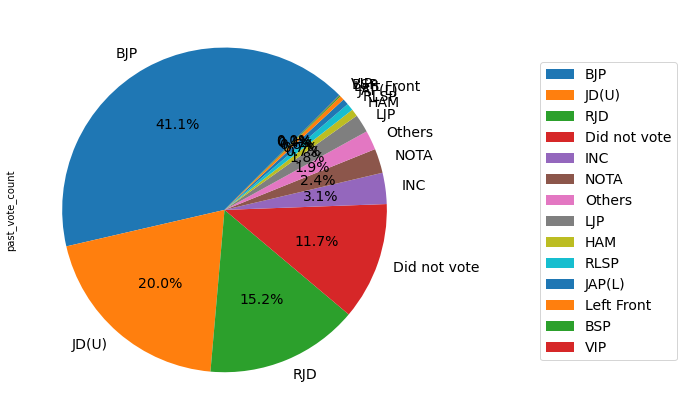

In [23]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
tempsurvey2.plot(kind='pie', y = 'past_vote_count', ax=ax1, autopct='%1.1f%%', 
 startangle=45, shadow=False, labels=tempsurvey2['past_vote'],  fontsize=14)
plt.legend( bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=14, 
           bbox_transform=plt.gcf().transFigure)


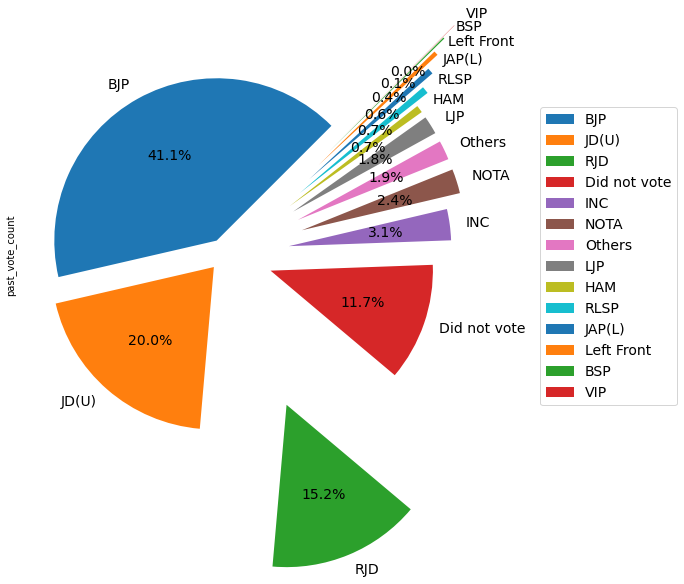

In [24]:
plt.figure(figsize=(16,8))
# plot chart
explode1 = (0.1, 0.1, 1, 0.3, 0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1)
ax1 = plt.subplot(121, aspect='equal')
tempsurvey2.plot(kind='pie', y = 'past_vote_count', ax=ax1, autopct='%1.1f%%', 
 startangle=45, shadow=False, explode=explode1, labels=tempsurvey2['past_vote'],  fontsize=14)
plt.legend( bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=14, 
           bbox_transform=plt.gcf().transFigure)


### Ans-6 part-2 Done above ^

In [99]:
# 7. For each day of sample collection, determine the proportion of respondents who were
# fully satisfied with the performance of the CM. So if there were a total of 1000 samples
# on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
# would be 0.3.
filter1=survey.loc[survey['CM_satisfaction'] == 'Fully Satisfied']
fltr = filter1.groupby(['collection_date']).agg('count')
fltr['CM_satisfaction_percent'] = (fltr['CM_satisfaction'] / fltr['CM_satisfaction'].sum()) * 100
fltr['CM_satisfaction_percent']=fltr['CM_satisfaction_percent'].round(decimals=1)
fltr[['CM_satisfaction','CM_satisfaction_percent']]

,CM_satisfaction,CM_satisfaction_percent
collection_date,,
2020-08-24,146,20.2
2020-08-25,95,13.2
2020-08-26,59,8.2
2020-08-27,54,7.5
2020-08-28,92,12.8
2020-08-29,73,10.1
2020-08-30,65,9.0
2020-08-31,62,8.6
2020-09-01,75,10.4


### Ans-7 Done above ^

In [104]:
# 8. In a similar fashion create a day-wise proportion of respondents that opted fully
# dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
# proportions on the y-axis.
filter2=survey.loc[survey['MLA_satisfaction'] == 'Fully Dissatisfied']
fltr2 = filter2.groupby(['collection_date']).agg('count')
fltr2['MLA_dis_satisfaction_percent'] = (fltr2['MLA_satisfaction'] / fltr2['MLA_satisfaction'].sum()) * 100
fltr2['MLA_dis_satisfaction_percent']=fltr2['MLA_dis_satisfaction_percent'].round(decimals=1)
fnl_plt=fltr2[['MLA_satisfaction','MLA_dis_satisfaction_percent']].reset_index()
fnl_plt

,collection_date,MLA_satisfaction,MLA_dis_satisfaction_percent
0,2020-08-24,887,21.4
1,2020-08-25,630,15.2
2,2020-08-26,353,8.5
3,2020-08-27,403,9.7
4,2020-08-28,462,11.1
5,2020-08-29,350,8.4
6,2020-08-30,361,8.7
7,2020-08-31,321,7.7
8,2020-09-01,385,9.3


(array([18498., 18499., 18500., 18501., 18502., 18503., 18504., 18505.,
        18506.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

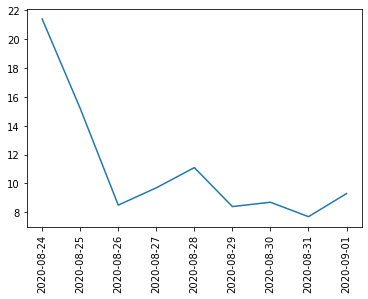

In [105]:
plt.plot(fnl_plt['collection_date'], fnl_plt['MLA_dis_satisfaction_percent'])
plt.xticks(rotation='vertical')

### Ans-8 Done above ^

In [24]:
# 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
# cell values as the count of samples.

tsy1=survey['Vote_Now'].value_counts().reset_index()
tsy2=survey['Past_Vote'].value_counts().reset_index()
tempsurvey6=pd.merge(tsy1, tsy2, on='index', how='outer')
tempsurvey6


,index,Vote_Now,Past_Vote
0,BJP,2367.0,2823.0
1,RJD,1996.0,1047.0
2,JD(U),526.0,1374.0
3,NOTA,458.0,167.0
4,JAP(L),313.0,42.0
5,Plurals,217.0,NaN
6,INC,216.0,213.0
7,Undecided,164.0,NaN
8,RJJP,142.0,NaN
9,LJP,102.0,125.0


In [25]:
tsy6 = pd.concat([tempsurvey1, tempsurvey2], axis=1)
tsy6

,vote_now,vote_now_count,past_vote,past_vote_count
0,BJP,2367,BJP,2823.0
1,RJD,1996,JD(U),1374.0
2,JD(U),526,RJD,1047.0
3,NOTA,458,Did not vote,804.0
4,JAP(L),313,INC,213.0
5,Plurals,217,NOTA,167.0
6,INC,216,Others,132.0
7,Undecided,164,LJP,125.0
8,RJJP,142,HAM,50.0
9,LJP,102,RLSP,49.0


In [26]:
pd.pivot_table(tempsurvey6,index="index")

,Past_Vote,Vote_Now
index,,
AAP,NaN,27.0
AIMIM,NaN,37.0
BJP,2823.0,2367.0
BSP,9.0,15.0
Did not vote,804.0,NaN
HAM,50.0,11.0
INC,213.0,216.0
JAP(L),42.0,313.0
JD(U),1374.0,526.0


### Ans-9 Done above ^

In [27]:
# 10. Repeat the above question with the cell values as the sum of “weight”.
ttsy1=survey.groupby(['Vote_Now']).sum().drop(['response_id','age','assembly_no'], axis = 1).reset_index()
ttsy2=survey.groupby(['Past_Vote']).sum().drop(['response_id','age','assembly_no'], axis = 1).reset_index()
tsy7 = pd.concat([ttsy1, ttsy2], axis=1)
tsy7

,Vote_Now,weight,Past_Vote,weight
0,AAP,45.620236,BJP,1819.705752
1,AIMIM,96.410323,BSP,41.137719
2,BJP,1546.903568,Did not vote,565.582563
3,BSP,50.015771,HAM,42.110354
4,HAM,19.423146,INC,429.978586
5,INC,429.904844,JAP(L),69.749576
6,JAP(L),327.226062,JD(U),1873.120263
7,JD(U),722.230271,LJP,192.112418
8,LJP,133.091786,Left Front,68.229827
9,Left Front,126.895591,NOTA,122.959180


In [65]:
ttsy1a=survey.groupby(['Vote_Now']).sum().drop(['response_id','age','assembly_no'], axis = 1).reset_index()
ttsy2a=survey.groupby(['Past_Vote']).sum().drop(['response_id','age','assembly_no'], axis = 1).reset_index()

ttsy1a.rename(columns = {'Vote_Now':'party'}, inplace = True)
ttsy2a.rename(columns = {'Past_Vote':'party'}, inplace = True)

tempsurvey6a=pd.merge(ttsy1a, ttsy2a, on='party', how='outer')
tempsurvey6a

,party,weight_x,weight_y
0,AAP,45.620236,NaN
1,AIMIM,96.410323,NaN
2,BJP,1546.903568,1819.705752
3,BSP,50.015771,41.137719
4,HAM,19.423146,42.110354
5,INC,429.904844,429.978586
6,JAP(L),327.226062,69.749576
7,JD(U),722.230271,1873.120263
8,LJP,133.091786,192.112418
9,Left Front,126.895591,68.229827


In [66]:
tempsurvey6a=tempsurvey6a.fillna(0)

In [67]:
tempsurvey6a['total_weight'] = tempsurvey6a['weight_x'] + tempsurvey6a['weight_y'] 
tempsurvey6a

,party,weight_x,weight_y,total_weight
0,AAP,45.620236,0.000000,45.620236
1,AIMIM,96.410323,0.000000,96.410323
2,BJP,1546.903568,1819.705752,3366.609320
3,BSP,50.015771,41.137719,91.153490
4,HAM,19.423146,42.110354,61.533500
5,INC,429.904844,429.978586,859.883430
6,JAP(L),327.226062,69.749576,396.975638
7,JD(U),722.230271,1873.120263,2595.350534
8,LJP,133.091786,192.112418,325.204204
9,Left Front,126.895591,68.229827,195.125418


In [68]:
tempsurvey6a.rename(columns = {'weight_x':'Vote_Now_weight','weight_y':'Past_Vote_weight'}, inplace = True)

In [70]:
tempsurvey6a

,party,Vote_Now_weight,Past_Vote_weight,total_weight
0,AAP,45.620236,0.000000,45.620236
1,AIMIM,96.410323,0.000000,96.410323
2,BJP,1546.903568,1819.705752,3366.609320
3,BSP,50.015771,41.137719,91.153490
4,HAM,19.423146,42.110354,61.533500
5,INC,429.904844,429.978586,859.883430
6,JAP(L),327.226062,69.749576,396.975638
7,JD(U),722.230271,1873.120263,2595.350534
8,LJP,133.091786,192.112418,325.204204
9,Left Front,126.895591,68.229827,195.125418


### Ans-10 Done above ^

In [71]:
tmpsrvy6a=tempsurvey6a.copy()

In [72]:
tmpsrvy6a=tmpsrvy6a.drop(['Vote_Now_weight','Past_Vote_weight'], axis = 1)
tmpsrvy6a

,party,total_weight
0,AAP,45.620236
1,AIMIM,96.410323
2,BJP,3366.609320
3,BSP,91.153490
4,HAM,61.533500
5,INC,859.883430
6,JAP(L),396.975638
7,JD(U),2595.350534
8,LJP,325.204204
9,Left Front,195.125418


In [187]:
# 11. Create a dataframe by performing a group by over age_group and calculate the count of
# total samples under each age_group.
tempsurvey4=survey['age_group'].value_counts().reset_index()
tempsurvey4

,index,age_group
0,25-40,3423
1,18-25,2692
2,40-55,644
3,55+,108


In [160]:
tempsurvey4.rename(columns = {'index':'age_group', 'age_group':'age_group_count'}, inplace = True)
tempsurvey4

,age_group,age_group_count
0,25-40,3423
1,18-25,2692
2,40-55,644
3,55+,108


### Ans-11 Done above ^

In [159]:
# 12. Create a dataframe by performing a group by over age_group and finding the count of
# total samples for each age_group that opted for the JD(U) party in Vote_Now.
ts=survey.copy()

filter = ts['Vote_Now']=='JD(U)'

ts.where(filter, inplace = True)

tempsurvey3=ts['age_group'].value_counts().reset_index()
tempsurvey3

,index,age_group
0,25-40,245
1,18-25,216
2,40-55,55
3,55+,10


In [162]:
tempsurvey3.rename(columns = {'index':'age_group', 'age_group':'age_group_count'}, inplace = True)
tempsurvey3

,age_group,age_group_count
0,25-40,245
1,18-25,216
2,40-55,55
3,55+,10


### Ans-12 Done above ^

In [164]:
# 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.
tempsurvey5=pd.merge(tempsurvey3, tempsurvey4, on='age_group', how='inner')
tempsurvey5

,age_group,age_group_count_x,age_group_count_y
0,25-40,245,3423
1,18-25,216,2692
2,40-55,55,644
3,55+,10,108


In [165]:
tempsurvey5.rename(columns = {'age_group_count_x':'age_group_count_12', 'age_group_count_y':'aage_group_count_11'}, inplace = True)
tempsurvey5

,age_group,age_group_count_12,aage_group_count_11
0,25-40,245,3423
1,18-25,216,2692
2,40-55,55,644
3,55+,10,108


### Ans-13 Done above ^

***